In [169]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [215]:
import os
import sys
pardir = os.path.dirname(os.getcwd())
sys.path.append(pardir)

In [216]:
from src.ar import YW_AR

# AR(2)の推定

In [217]:
c = 2
phi = 0.2
phi2 = 0.3
var = 4

ini_y = 13

T = 10000

y = np.zeros(T)
x = np.zeros(T)

# 再現性のためあらかじめ作成しておく
np.random.seed(seed=5)
eps = np.random.normal(loc = 0, scale = np.sqrt(var),size  = T)

y[0] = ini_y
for t in range(2,T):
    y[t] = c + phi * y[t-1] + phi2 * y[t-2] + eps[t]



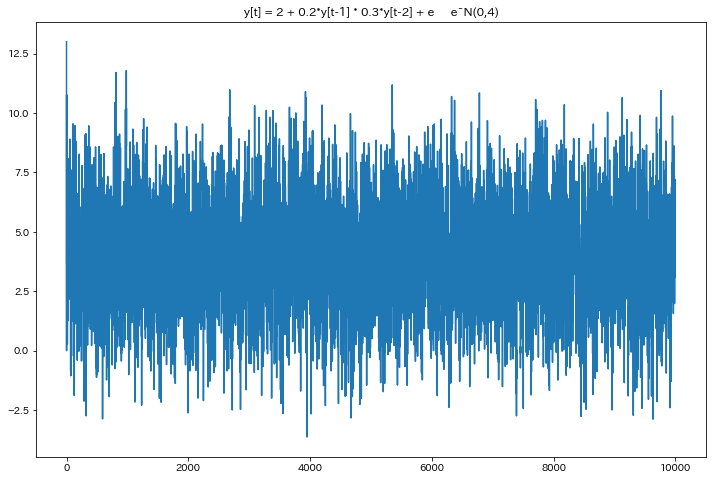

In [218]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot([i for i in range(len(y))], y)
ax.set_title("y[t] = 2 + 0.2*y[t-1] * 0.3*y[t-2] + e     e~N(0,4)")
plt.savefig('fig/ar_2.png') 
plt.show()

In [219]:
# モデルの生成
model = sm.tsa.AR(y)

# AICでモデルの次数を選択
order = model.select_order(maxlag=3, ic='aic')
print("次数は{}".format(order))

# 推定
model_fit = model.fit(maxlag=order) 

print("パラメタは")
print(model_fit.params)
print("分散は")
print(model_fit.sigma2)


次数は2
パラメタは
[ 1.9869473   0.2051959   0.29791684]
分散は
4.00736207654


# 自作の推定

In [220]:
model = YW_AR(p=2)
model.fit(y)
model.show_model()

y[t] = 1.99 + 0.20 * y[t-1] + 0.30 * y[t-2] + e      e ~ N(0,4.01)


# AR(3)の実装

In [221]:
c = 2
phi = 0.2
phi2 = 0.3
phi3 = 0.1
var = 4

ini_y = 13

T = 10000

y = np.zeros(T)
x = np.zeros(T)

# 再現性のためあらかじめ作成しておく
np.random.seed(seed=5)
eps = np.random.normal(loc = 0, scale = np.sqrt(var),size  = T)

y[0] = ini_y
for t in range(3,T):
    y[t] = c + phi * y[t-1] + phi2 * y[t-2]+ phi3 * y[t-3] + eps[t]

# モデルの生成
model = sm.tsa.AR(y)

# AICでモデルの次数を選択
order = model.select_order(maxlag=4, ic='aic')
print("次数は{}".format(order))

# 推定
model_fit = model.fit(maxlag=order) 

print("パラメタは")
print(model_fit.params)
print("分散は")
print(model_fit.sigma2)



次数は3
パラメタは
[ 1.98158597  0.20704322  0.29764317  0.09878037]
分散は
4.00531224028


In [222]:
model_fit.aic

1.3886218401877417

# 自作の推定

r = np.corrcoef([y[:-2], y[1:-1], y[2:]])
inv_r = np.linalg.inv(r)
r_2 = np.corrcoef([y[:-3],y[1:-2], y[2:-1],y[3:]])[:,0][1:]
np.dot(inv_r,r_2)

In [223]:
model = YW_AR(p=3)
model.fit(y)
model.show_model()

y[t] = 1.99 + 0.21 * y[t-1] + 0.30 * y[t-2] + 0.10 * y[t-3] + e      e ~ N(0,4.01)
